# MNIST Data - Sequential API
- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np

## Data

In [15]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [16]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [17]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train_[idx]
y_train = y_train[idx]
X_test = X_test_[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28)
(2000, 28, 28)
(2000,)
(2000,)


## Model building
- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [18]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

## Compile model
- Prepare for fitting

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.trainable_variables[0]

<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.04687424, -0.00851243,  0.06165456, ..., -0.00479915,
         0.06110143,  0.0500296 ],
       [ 0.07054383,  0.02820875,  0.0519064 , ..., -0.01538563,
         0.05915637, -0.05586063],
       [-0.0201322 ,  0.05896071, -0.03885825, ...,  0.05931532,
        -0.04632793, -0.02942678],
       ...,
       [-0.07527557, -0.04598112, -0.06555264, ..., -0.04144285,
         0.01034114,  0.07240469],
       [ 0.00402658,  0.02094143, -0.04973064, ...,  0.01532831,
        -0.02220114,  0.04091913],
       [ 0.02033915, -0.02527291, -0.06171497, ...,  0.0744134 ,
         0.00964639,  0.03324147]], dtype=float32)>

## Training (Fitting)
- The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [22]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
57/57 [==============================] - 2s 29ms/step - loss: 1.5299 - accuracy: 0.5489 - val_loss: 0.5545 - val_accuracy: 0.8600
Epoch 2/20
57/57 [==============================] - 1s 23ms/step - loss: 0.4700 - accuracy: 0.8822 - val_loss: 0.4688 - val_accuracy: 0.8750
Epoch 3/20
57/57 [==============================] - 1s 15ms/step - loss: 0.3636 - accuracy: 0.9045 - val_loss: 0.3696 - val_accuracy: 0.8950
Epoch 4/20
57/57 [==============================] - 1s 10ms/step - loss: 0.2516 - accuracy: 0.9424 - val_loss: 0.3389 - val_accuracy: 0.9250
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 0.2017 - accuracy: 0.9524 - val_loss: 0.3312 - val_accuracy: 0.9200
Epoch 6/20
57/57 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9623 - val_loss: 0.3197 - val_accuracy: 0.9250
Epoch 7/20
57/57 [==============================] - 0s 8ms/step - loss: 0.1413 - accuracy: 0.9739 - val_loss: 0.3214 - val_accuracy: 0.9200
Epoch 8/20
57/5

In [23]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val]}')


loss                : ['1.09', '0.45', '0.33', '0.25', '0.21', '0.16', '0.14', '0.12', '0.10', '0.08', '0.07', '0.06', '0.05', '0.04', '0.04', '0.03', '0.03', '0.02', '0.02', '0.02']
accuracy            : ['0.70', '0.89', '0.92', '0.94', '0.95', '0.96', '0.97', '0.98', '0.98', '0.99', '1.00', '0.99', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
val_loss            : ['0.55', '0.47', '0.37', '0.34', '0.33', '0.32', '0.32', '0.32', '0.33', '0.32', '0.33', '0.33', '0.33', '0.33', '0.33', '0.34', '0.35', '0.35', '0.35', '0.36']
val_accuracy        : ['0.86', '0.88', '0.89', '0.93', '0.92', '0.93', '0.92', '0.93', '0.91', '0.92', '0.92', '0.93', '0.93', '0.92', '0.93', '0.93', '0.94', '0.93', '0.93', '0.94']


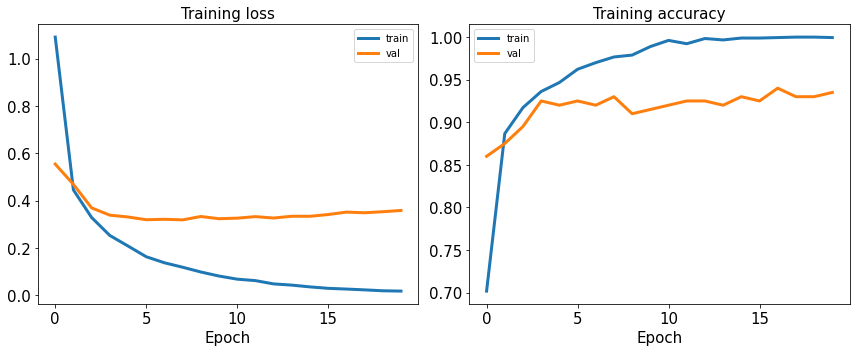

In [24]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

#plt.savefig('mnist1.pdf')

plt.show()

## Evaluation
- The `Model.evaluate` method checks the models performance.

In [25]:
model.evaluate(X_test,  y_test)

63/63 [==============================] - 1s 12ms/step - loss: 0.4961 - accuracy: 0.8705


[0.4961208701133728, 0.8705000281333923]

In [26]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(2000, 10)
[[ -5.870202   -7.0599275  -2.737456    0.5788384   6.4873023  -6.837711
  -10.680508   -1.9428189  -9.0796      2.8503397]
 [ -2.596835  -10.013222   -7.9838657  -0.9103726  -9.2117     12.187669
  -11.942464   -6.3257656   1.6720117  -1.1088184]]


Return a probability, you can wrap the trained model, and attach the softmax to it:

In [27]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [28]:
y_hat_softmax = probability_model(X_test[:1])
print(y_hat_softmax.numpy())

[[4.1747530e-06 1.2703981e-06 9.5756055e-05 2.6388473e-03 9.7146547e-01
  1.5865293e-06 3.4004877e-08 2.1196871e-04 1.6858094e-07 2.5580769e-02]]


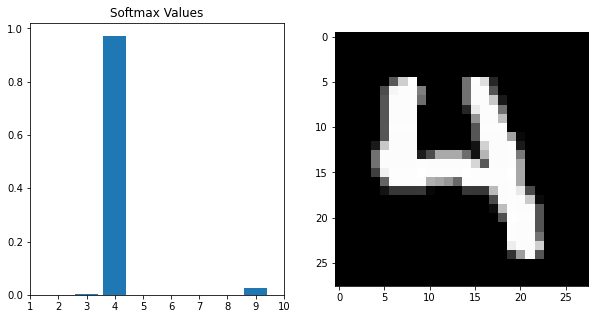

In [29]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1,2, figsize=(10,5))
yp = y_hat_softmax.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title('Softmax Values')
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1,10])
axes[1].imshow(X_test[0], cmap='gray')
plt.show()

In [30]:
# Find misclassification
y_pred_tf = probability_model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 259


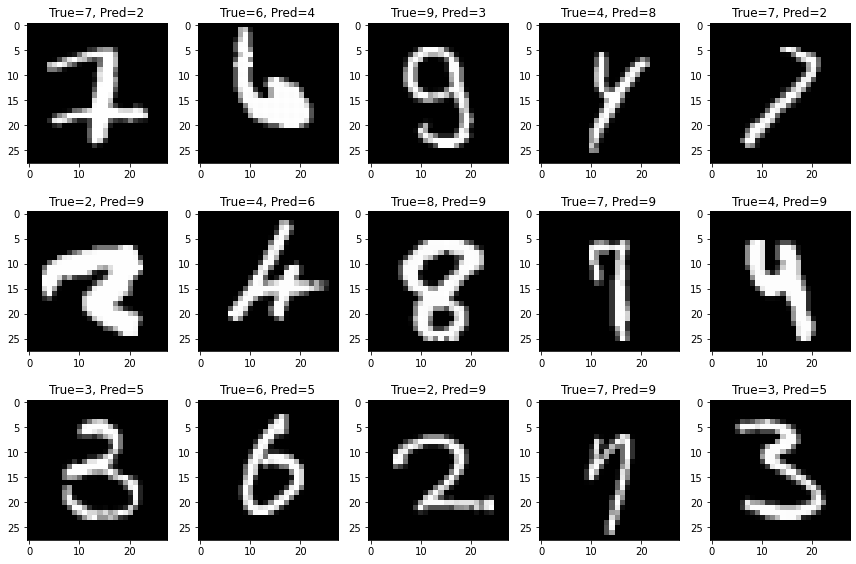

In [31]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()